# Foreground Extraction [Grabcut Algorithm]

#### Import Importnt Libraries 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
#image_path
img_path="image1.jpg"

#read image
img_raw = cv2.imread(img_path)

#### To Select the Object :
- After Selecting the Object press ``enter`` then press ``Esc`` two times.  

In [3]:
#select ROIs function
ROIs = cv2.selectROIs("Select Rois",img_raw)

#print rectangle points of selected ROI
print(ROIs)


[[ 52 139 348 344]]


In [4]:
#Crop selected ROI from Orginal image
#counter to save image with different name

crop_number=0 

#loop over every bounding box save in array "ROIs"
for rect in ROIs:
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    
    #crop ROI from original image
    img_crop=img_raw[y1:y1+y2,x1:x1+x2]

    #show cropped image
    cv2.imshow("crop"+str(crop_number),img_crop)
    
    #save cropped image
    cv2.imwrite("crop"+str(crop_number)+".jpg",img_crop)
    
    print(x1,y1,x2,y2)
    crop_number+=1

#hold the window
cv2.waitKey(0)

52 139 348 344


27

#### Foreground Extraction in an Image using Grabcut Algorithm

**- Path to input image specified.**

**- Then, the image is loaded with imread command.** 

In [5]:
image = cv2.imread('image1.jpg')

**- Create a simple mask image similar to the loaded image, with the shape and return type.**

In [6]:
mask = np.zeros(image.shape[:2], np.uint8)

**- Specify the Background and Foreground model.**

**- Using numpy the array is constructed of 1 row and 65 columns, and all array elements are 0.**

**- Data type for the array is np.float64 (default).**

In [7]:
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

**- Define the Region of Interest (ROI) as the coordinates of the rectangle.**

**- Using previoues selected object by ROI we will use the extracted coordinates ```x1,y1,x2,y2``` .**

**- Where the values are entered as ```(startingPoint_x, startingPoint_y, width, height)```.**

In [8]:
rectangle = (x1, y1, x2, y2)

**- Apply the grabcut algorithm with appropriate values as parameters, number of iterations = 5.**

**- ``cv2.GC_INIT_WITH_RECT`` is used becauseof the rectangle mode is used.**

**- In the new mask image, pixels will be marked with four flags.**

**- Four flags denote the background / foreground.**

**- Mask is changed, all the 0 and 2 pixels are converted to the background.**

**- Mask is changed, all the 1 and 3 pixels are now the part of the foreground.**

**- The return type is also mentioned, this gives us the final mask.**

In [9]:
cv2.grabCut(image, mask, rectangle,backgroundModel, foregroundModel,3, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

**-The final mask is multiplied with the input image to give the segmented image.**

In [10]:
image = image * mask2[:, :, np.newaxis]

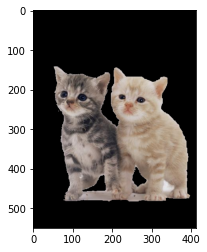

In [11]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Image.fromarray(image).save('image010.png')

plt.imshow(image)
plt.show()


##### **Convert the Black Background  from Black to Transparent Background**

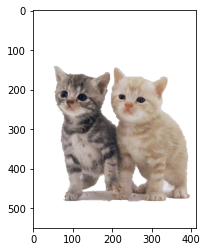

In [12]:
img = Image.open('image010.png')
rgba = img.convert("RGBA")
datas = rgba.getdata()
  
newData = []
for item in datas:
    if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
        # storing a transparent value when we find a black colour
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)  # other colours remain unchanged
        
        
rgba.putdata(newData)

rgba.save("transparent_image.png", "PNG")

img_read =cv2.imread('transparent_image.png',cv2.IMREAD_UNCHANGED)

img_view = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)

Image.fromarray(img_view).save('transparent_image.png')

plt.imshow(img_view)
plt.show()